This analysis is used only to process the outputs of the tests, parse them and get the mean so we can analize the results

## Import libraries

In [1]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

def delete_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[column] >= upper)[0]
    lower_array = np.where(df[column] <= lower)[0]

    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)

    print("New Shape: ", df.shape)
    sns.boxplot(df[column])
    return df

def parse_pdes(file):
    file = open(file, mode = 'r')
    lines = file.readlines()
    file.close()

    start_time  = []
    end_time    = []
    total_time  = []
    kernels     = []
    kernel_id   = []
    lp_kernel   = []
    threads     = []
    executed    = []
    commited    = []
    reprocessed = []
    rollbacks   = []
    antimessages= []
    r_frequency = []
    r_length    = []
    efficiency  = []
    event_cost  = []
    ema         = []
    checkpoint  = []
    recovery    = []
    log_size    = []
    idle_cycles = []
    gvt         = []
    gvt_redux   = []
    time_speed  = []
    memory      = []
    peak_memory = []

    for line in lines:
        tmp = re.search(r"SIMULATION STARTED AT ..... : (.*)", line)
        if tmp: 
            start_time.append(tmp.group(1))
            continue

        tmp = re.search(r"SIMULATION FINISHED AT .... : (.*)", line)
        if tmp:
            end_time.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL SIMULATION TIME ..... : (.*)", line)
        if tmp: 
            total_time.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL KERNELS ............. : (.*)", line)
        if tmp: 
            kernels.append(tmp.group(1))
            continue

        tmp = re.search(r"KERNEL ID ................. : (.*)", line)
        if tmp: 
            kernel_id.append(tmp.group(1))
            continue

        tmp = re.search(r"LPs HOSTED BY KERNEL....... : (.*)", line)
        if tmp:
            lp_kernel.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL_THREADS ............. : (.*)", line)
        if tmp:
            threads.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL EXECUTED EVENTS ..... : (.*)", line)
        if tmp:
            executed.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL COMMITTED EVENTS..... : (.*)", line)
        if tmp:
            commited.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL REPROCESSED EVENTS... : (.*)", line)
        if tmp:
            reprocessed.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL ROLLBACKS EXECUTED... : (.*)", line)
        if tmp:
            rollbacks.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL ANTIMESSAGES......... : (.*)", line)
        if tmp:
            antimessages.append(tmp.group(1))
            continue

        tmp = re.search(r"ROLLBACK FREQUENCY......... : (.*)", line)
        if tmp:
            r_frequency.append(tmp.group(1))
            continue

        tmp = re.search(r"ROLLBACK LENGTH............ : (.*)", line)
        if tmp:
            r_length.append(tmp.group(1))
            continue

        tmp = re.search(r"EFFICIENCY................. : (.*)", line)
        if tmp:
            efficiency.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE EVENT COST .EMA.... : (.*)", line)
        if tmp:
            ema.append(tmp.group(1))
            continue
        
        tmp = re.search(r"AVERAGE EVENT COST......... : (.*)", line)
        if tmp:
            event_cost.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE CHECKPOINT COST.... : (.*)", line)
        if tmp:
            checkpoint.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE RECOVERY COST...... : (.*)", line)
        if tmp:
            recovery.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE LOG SIZE........... : (.*)", line)
        if tmp:
            log_size.append(tmp.group(1))
            continue

        tmp = re.search(r"IDLE CYCLES................ : (.*)", line)
        if tmp:
            idle_cycles.append(tmp.group(1))
            continue

        tmp = re.search(r"LAST COMMITTED GVT ........ : (.*)", line)
        if tmp:
            gvt.append(tmp.group(1))
            continue

        tmp = re.search(r"NUMBER OF GVT REDUCTIONS... : (.*)", line)
        if tmp:
            gvt_redux.append(tmp.group(1))
            continue

        tmp = re.search(r"SIMULATION TIME SPEED...... : (.*)", line)
        if tmp:
            time_speed.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE MEMORY USAGE....... : (.*)", line)
        if tmp:
            memory.append(tmp.group(1))
            continue

        tmp = re.search(r"PEAK MEMORY USAGE.......... : (.*)", line)
        if tmp:
            peak_memory.append(tmp.group(1))
            continue 


    
    df = pd.DataFrame({
        "Start time"                : start_time,
        "Finish time"               : end_time,
        "Total time"                : total_time,
        "Total kernels"             : kernels,
        "Kernel id"                 : kernel_id,
        "LPs hosted by kernel"      : lp_kernel,
        "Total threads"             : threads,
        "Total executed events"     : executed,
        "Total commited events"     : commited,
        "Total reprocessed events"  : reprocessed,
        "Total rollbacks"           : rollbacks,
        "Total antimessages"        : antimessages,
        "Rollback frequency"        : r_frequency,
        "Rollback length"           : r_length,
        "Efficiency"                : efficiency,
        "Average event cost"        : event_cost,
        "Average event cost (EMA)"  : ema,
        "Average checkpoint cost"   : checkpoint,
        "Average recovery cost"     : recovery,
        "Average log size"          : log_size,
        "Idle cycles"               : idle_cycles,
        "Last commited gvt"         : gvt,
        "Number of gvt reductions"  : gvt_redux,
        "Simulation time speed"     : time_speed,
        "Average memory usage"      : memory,
        "Peak memory usage"         : peak_memory
    })
        
    cols = ["Total kernels","Kernel id","LPs hosted by kernel","Total threads","Total executed events","Total commited events","Total reprocessed events","Idle cycles","Last commited gvt","Number of gvt reductions"]
    df[cols] = df[cols].apply(pd.to_numeric)
    df['Total time'] = df['Total time'].str.replace('seconds', '')
    df['Total time'] = df['Total time'].apply(pd.to_numeric)
    
    return df

def parse_pdes_wr(file_name, events):
    file = open(file_name, mode = 'r')
    lines = file.readlines()
    file.close()

    total_time  = []
    commited    = []


    for line in lines:

        tmp = re.search(r"committed "+f"{events}"+r" events in (.*),", line)
        if tmp: 
            total_time.append(tmp.group(1))
            continue



    
    df_wr = pd.DataFrame({
        "Total time"                : total_time
    })

    df_wr["Total commited events"] = events
        
    print (df_wr)
    
    df_wr['Total time'] = df_wr['Total time'].str.replace('s', '')
    df_wr['Total time'] = df_wr['Total time'].apply(pd.to_numeric)
    
    df_wr.info(verbose=True)
    
    return df_wr

# Time warp

### Data cleaning

New Shape:  (67, 26)


,Total time,Total commited events,LPs hosted by kernel,Total threads,Total commited events,Last commited gvt
count,67.000000,67.000000,67.0,67.0,67.000000,67.000000
mean,9.454940,238945.208955,1764.0,2.0,238945.208955,109.525505
std,1.872514,51322.156547,0.0,0.0,51322.156547,23.148912
min,6.668000,158500.000000,1764.0,2.0,158500.000000,76.122524
25%,7.785000,203471.000000,1764.0,2.0,203471.000000,92.763103
50%,9.505000,231602.000000,1764.0,2.0,231602.000000,106.388263
75%,10.658500,274860.000000,1764.0,2.0,274860.000000,121.020488
max,14.707000,365363.000000,1764.0,2.0,365363.000000,187.113121


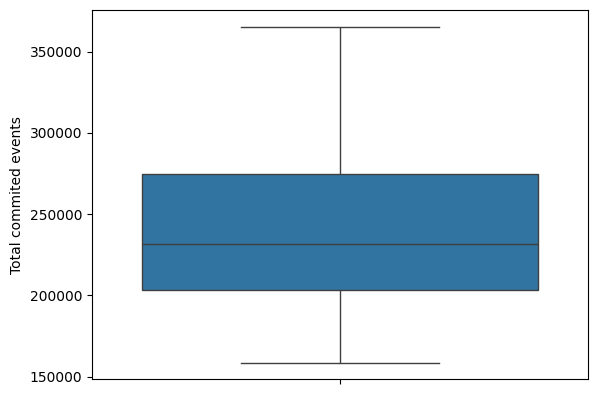

In [18]:
df = parse_pdes('lookahead/tw/segregation_test_2_1764.o')
#df.info(verbose=True)
df = delete_outliers(df,'Total commited events')
#df = delete_outliers(df,'Total time')
df[["Total time", "Total commited events" , "LPs hosted by kernel",
        "Total threads", "Total commited events", "Last commited gvt"]].describe()

In [7]:
df.describe()

,Total time,Total kernels,Kernel id,LPs hosted by kernel,Total threads,Total executed events,Total commited events,Total reprocessed events,Idle cycles,Last commited gvt,Number of gvt reductions
count,98.000000,98.0,98.0,98.0,98.0,9.800000e+01,9.800000e+01,98.000000,98.000000,9.800000e+01,98.000000
mean,4.698122,1.0,0.0,1024.0,2.0,4.984707e+05,3.963993e+05,74068.734694,10306.153061,3.923455e+06,3.683673
std,1.794083,0.0,0.0,0.0,0.0,2.548732e+05,2.043782e+05,43019.999726,5304.165578,1.995910e+06,1.814017
min,2.923000,1.0,0.0,1024.0,2.0,2.081530e+05,1.655550e+05,25775.000000,3943.000000,1.670166e+06,2.000000
25%,2.970000,1.0,0.0,1024.0,2.0,2.791812e+05,2.206292e+05,37169.000000,5738.750000,2.202743e+06,2.000000
50%,3.970000,1.0,0.0,1024.0,2.0,4.141800e+05,3.318930e+05,60147.500000,8480.000000,3.295318e+06,3.000000
75%,5.968000,1.0,0.0,1024.0,2.0,6.934202e+05,5.525322e+05,101642.250000,14212.500000,5.448042e+06,5.000000
max,9.971000,1.0,0.0,1024.0,2.0,1.236658e+06,1.010217e+06,219145.000000,27677.000000,9.920968e+06,9.000000


#### temp

In [ ]:
df_tw_2_2  = pd.DataFrame(df[df['LPs hosted by kernel']==2])
 
df_tw_4_2  = pd.DataFrame(df[(df['LPs hosted by kernel']==4) & (df['Total threads']==2)])
df_tw_4_3  = pd.DataFrame(df[(df['LPs hosted by kernel']==4) & (df['Total threads']==3)])
df_tw_4_4  = pd.DataFrame(df[(df['LPs hosted by kernel']==4) & (df['Total threads']==4)])
 
df_tw_8_2  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==2)] )
df_tw_8_3  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==3)] )
df_tw_8_4  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==4)] )
df_tw_8_5  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==5)] )
df_tw_8_6  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==6)] )
df_tw_8_7  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==7)] )
df_tw_8_8  = pd.DataFrame(df[(df['LPs hosted by kernel']==8) & (df['Total threads']==8)] )

df_tw_16_2  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==2 )] )
df_tw_16_3  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==3 )] )
df_tw_16_4  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==4 )] )
df_tw_16_5  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==5 )] )
df_tw_16_6  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==6 )] )
df_tw_16_7  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==7 )] )
df_tw_16_8  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==8 )] )
df_tw_16_9  = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==9 )] )
df_tw_16_10 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==10)] )
df_tw_16_11 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==11)] )
df_tw_16_12 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==12)] )
df_tw_16_13 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==13)] )
df_tw_16_14 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==14)] )
df_tw_16_15 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==15)] )
df_tw_16_16 = pd.DataFrame(df[(df['LPs hosted by kernel']==16) & (df['Total threads']==16)] )

df_tw_32_2  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==2 )])
df_tw_32_3  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==3 )])
df_tw_32_4  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==4 )])
df_tw_32_5  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==5 )])
df_tw_32_6  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==6 )])
df_tw_32_7  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==7 )])
df_tw_32_8  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==8 )])
df_tw_32_9  = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==9 )])
df_tw_32_10 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==10)])
df_tw_32_11 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==11)])
df_tw_32_12 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==12)])
df_tw_32_13 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==13)])
df_tw_32_14 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==14)])
df_tw_32_15 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==15)])
df_tw_32_16 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==16)])
df_tw_32_17 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==17)])
df_tw_32_18 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==18)])
df_tw_32_19 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==19)])
df_tw_32_20 = pd.DataFrame(df[(df['LPs hosted by kernel']==32) & (df['Total threads']==20)])

df_tw_64_2  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==2 )] )
df_tw_64_3  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==3 )] )
df_tw_64_4  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==4 )] )
df_tw_64_5  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==5 )] )
df_tw_64_6  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==6 )] )
df_tw_64_7  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==7 )] )
df_tw_64_8  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==8 )] )
df_tw_64_9  = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==9 )] )
df_tw_64_10 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==10)] )
df_tw_64_11 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==11)] )
df_tw_64_12 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==12)] )
df_tw_64_13 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==13)] )
df_tw_64_14 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==14)] )
df_tw_64_15 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==15)] )
df_tw_64_16 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==16)] )
df_tw_64_17 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==17)] )
df_tw_64_18 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==18)] )
df_tw_64_19 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==19)] )
df_tw_64_20 = pd.DataFrame(df[(df['LPs hosted by kernel']==64) & (df['Total threads']==20)] )

df_tw_128_2 = pd.DataFrame(df[(df['LPs hosted by kernel']==128) & (df['Total threads']==2)])
df_tw_128_3 = pd.DataFrame(df[(df['LPs hosted by kernel']==128) & (df['Total threads']==3)])
df_tw_128_4 = pd.DataFrame(df[(df['LPs hosted by kernel']==128) & (df['Total threads']==4)])
df_tw_128_5 = pd.DataFrame(df[(df['LPs hosted by kernel']==128) & (df['Total threads']==5)])

#df_tw_128_6 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==6])
#df_tw_128_7 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==7])
#df_tw_128_8 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==8])
#df_tw_128_9 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==9])
#df_tw_128_0 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==0])
#df_tw_128_1 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==1])
#df_tw_128_2 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==2])
#df_tw_128_3 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==3])
#df_tw_128_4 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==4])
#df_tw_128_5 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==5])
#df_tw_128_6 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==6])
#df_tw_128_7 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==7])
#df_tw_128_8 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==8])
#df_tw_128_9 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==9])
#df_tw_128_0 = pd.DataFrame(df[df['LPs hosted by kernel']==128] & df[df['Total threads']==0])

# DES

### Data parsing

In [19]:
def parse_des(file_path):
    
    file = open(file_path, mode = 'r')
    lines = file.readlines()
    file.close()

    start_time  = []
    end_time    = []
    total_time  = []
    lp_kernel   = []
    executed    = []
    event_cost  = []
    ema         = []
    gvt         = []
    time_speed  = []
    memory      = []
    peak_memory = []

    for line in lines:
        tmp = re.search(r"SIMULATION STARTED AT ..... : (.*)", line)
        if tmp: 
            start_time.append(tmp.group(1))
            continue

        tmp = re.search(r"SIMULATION FINISHED AT .... : (.*)", line)
        if tmp:
            end_time.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL SIMULATION TIME ..... : (.*)", line)
        if tmp: 
            total_time.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL LPs.................. : (.*)", line)
        if tmp:
            lp_kernel.append(tmp.group(1))
            continue

        tmp = re.search(r"TOTAL EXECUTED EVENTS ..... : (.*)", line)
        if tmp:
            executed.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE EVENT COST .EMA.... : (.*)", line)
        if tmp:
            ema.append(tmp.group(1))
            continue
        
        tmp = re.search(r"AVERAGE EVENT COST......... : (.*)", line)
        if tmp:
            event_cost.append(tmp.group(1))
            continue

        tmp = re.search(r"LAST COMMITTED GVT ........ : (.*)", line)
        if tmp:
            gvt.append(tmp.group(1))
            continue

        tmp = re.search(r"SIMULATION TIME SPEED...... : (.*)", line)
        if tmp:
            time_speed.append(tmp.group(1))
            continue

        tmp = re.search(r"AVERAGE MEMORY USAGE....... : (.*)", line)
        if tmp:
            memory.append(tmp.group(1))
            continue

        tmp = re.search(r"PEAK MEMORY USAGE.......... : (.*)", line)
        if tmp:
            peak_memory.append(tmp.group(1))
            continue 

    
    df_des = pd.DataFrame({
        "Start time"                : start_time,
        "Finish time"               : end_time,
        "Total time"                : total_time,
        "LPs"                       : lp_kernel,
        "Total executed events"     : executed,
        "Average event cost"        : event_cost,
        "Average event cost (EMA)"  : ema,
        "Last commited gvt"         : gvt,
        "Simulation time speed"     : time_speed,
        "Average memory usage"      : memory,
        "Peak memory usage"         : peak_memory
    })
        

    cols = ["LPs","Total executed events","Last commited gvt"]
    df_des[cols] = df_des[cols].apply(pd.to_numeric)
    df_des['Total time'] = df_des['Total time'].str.replace('seconds', '')
    df_des['Total time'] = df_des['Total time'].apply(pd.to_numeric)

    df_des = delete_outliers(df_des,'Total executed events')
    #df_des = delete_outliers(df_des,'Total time')
    df_des[cols].describe()

    return df_des

New Shape:  (100, 11)


,Total time,LPs,Total executed events,Last commited gvt
count,100.000000,100.0,1.000000e+02,100.000000
mean,27.990720,1764.0,1.359732e+06,594.711843
std,39.787935,0.0,1.976577e+06,896.945901
min,1.105000,1764.0,2.901100e+04,0.000000
25%,2.021250,1764.0,6.876725e+04,7.317126
50%,3.023000,1764.0,1.068595e+05,23.293456
75%,81.330000,1764.0,4.059390e+06,1978.122034
max,123.609000,1764.0,5.858414e+06,1999.732598


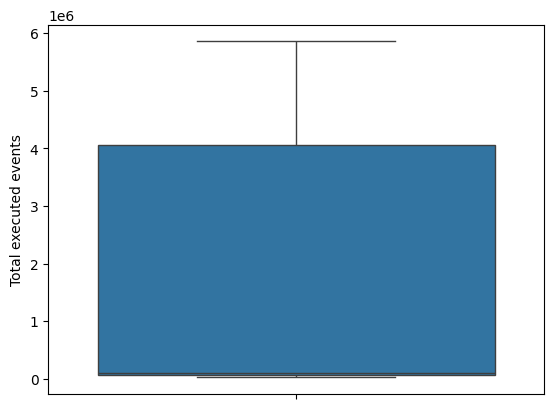

In [43]:
df = parse_des('lookahead/tw/segregation_seq_test_1764.o')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start time                200 non-null    object 
 1   Finish time               200 non-null    object 
 2   Total time                200 non-null    float64
 3   LPs                       200 non-null    int64  
 4   Total executed events     200 non-null    int64  
 5   Average event cost        200 non-null    object 
 6   Average event cost (EMA)  200 non-null    object 
 7   Last commited gvt         200 non-null    float64
 8   Simulation time speed     200 non-null    object 
 9   Average memory usage      200 non-null    object 
 10  Peak memory usage         200 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.3+ KB
New Shape:  (200, 11)
New Shape:  (200, 11)


,Total time,LPs,Total executed events,Last commited gvt
count,200.000000,200.0,2.000000e+02,200.000000
mean,0.823870,64.0,1.600516e+06,29489.808405
std,0.840539,0.0,1.603584e+06,30069.575590
min,0.000000,64.0,7.880000e+02,0.000000
25%,0.000000,64.0,9.287500e+02,0.000000
50%,0.670500,64.0,1.599486e+06,23003.289562
75%,1.626000,64.0,3.200040e+06,57740.547708
max,2.791000,64.0,3.202210e+06,92304.671253


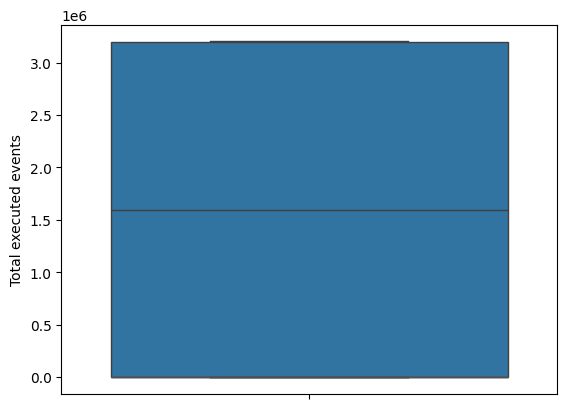

In [20]:
cols = ["LPs","Total executed events","Last commited gvt"]
df_des[cols] = df_des[cols].apply(pd.to_numeric)
df_des['Total time'] = df_des['Total time'].str.replace('seconds', '')
df_des['Total time'] = df_des['Total time'].apply(pd.to_numeric)
df_des.info(verbose=True)

df_des = delete_outliers(df_des,'Total executed events')
df_des = delete_outliers(df_des,'Total time')
df_des.describe()

In [ ]:
df_des_2 = pd.DataFrame(df_des[df_des['LPs']==2])
df_des_4 = pd.DataFrame(df_des[df_des['LPs']==4])
df_des_8 = pd.DataFrame(df_des[df_des['LPs']==8])
df_des_16 = pd.DataFrame(df_des[df_des['LPs']==16])
df_des_32 = pd.DataFrame(df_des[df_des['LPs']==32])
df_des_64 = pd.DataFrame(df_des[df_des['LPs']==64])
df_des_128 = pd.DataFrame(df_des[df_des['LPs']==128])

### Data cleanning

In [ ]:
sns.boxplot(df_des_2['Total executed events'])
plt.show()
sns.boxplot(df_des_4['Total executed events'])
plt.show()
sns.boxplot(df_des_8['Total executed events'])
plt.show()
sns.boxplot(df_des_16['Total executed events'])
plt.show()
sns.boxplot(df_des_32['Total executed events'])
plt.show()

In [ ]:
def delete_outliers (df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[col] >= upper)[0]
    lower_array = np.where(df[col] <= lower)[0]

    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)

    print("New Shape: ", df.shape)
    sns.boxplot(df[col])
    plt.show()

In [ ]:
delete_outliers(df=df_des_2, col='Total executed events')
delete_outliers(df=df_des_8, col='Total executed events')
delete_outliers(df=df_des_16, col='Total executed events')
delete_outliers(df=df_des_32, col='Total executed events')
delete_outliers(df=df_des_4, col='Total executed events')

In [ ]:
sns.boxplot(df_des_2['Total time'])
plt.show()
sns.boxplot(df_des_4['Total time'])
plt.show()
sns.boxplot(df_des_8['Total time'])
plt.show()
sns.boxplot(df_des_16['Total time'])
plt.show()
sns.boxplot(df_des_32['Total time'])
plt.show()

In [ ]:
df_des_2 = delete_outliers(df=df_des_2, col='Total time')
df_des_4 = delete_outliers(df=df_des_4, col='Total time')
df_des_8 = delete_outliers(df=df_des_8, col='Total time')
df_des_16 = delete_outliers(df=df_des_16, col='Total time')
df_des_32 = delete_outliers(df=df_des_32, col='Total time')

# Window racer

### Data parsing

### Data cleaning

In [ ]:
df_wr = parse_pdes_wr('test_wr.o', 159326)
df_wr = delete_outliers(df_wr,'Total time')

In [ ]:
df_wr.describe()